## Project 2: Customer Segmentation

## Objective: 
### Assist the automobile company in segmenting new potential customers for targeted outreach and communication based on the existing successful segmentation strategy in their current market.

4. Customer Segmentation Modeling:  

    <ins>Objective</ins>: Develop a segmentation model to categorize new potential customers into groups similar to the existing customer segments (A, B, C, D).  
    <ins>Steps</ins>: Define the target variable as "Segmentation" and other relevant features for segmentation modeling.
    Choose an appropriate segmentation algorithm (e.g., k-means clustering).
    Train the model on the existing customer data with known segments (A, B, C, D).
    Apply the trained model to predict segments for the new potential customers.  

5. Segmentation Validation:  

    <ins>Objective</ins>: Validate the segmentation model's effectiveness and assess its performance on the existing dataset.  
    <ins>Steps</ins>: Evaluate the model's performance using relevant metrics (e.g., silhouette score, if using k-means).
    Validate the predicted segments against the known segments in the existing dataset.
    Adjust the model as needed based on validation results.  

6. Interpretation and Profiling:  

    <ins>Objective</ins>: Interpret the characteristics of each customer segment and create customer profiles.  
    <ins>Steps</ins>: Analyze the features that contribute to the segmentation of customers.
    Create detailed profiles for each segment, highlighting the distinguishing characteristics.
    Provide insights into the preferences and behaviors associated with each segment.  

5. Recommendations for Outreach:  

    <ins>Objective</ins>: Provide actionable recommendations for targeted outreach and communication strategies for each customer segment.  
    <ins>Steps</ins>: Based on the identified customer profiles, suggest personalized communication approaches for each segment.
    Highlight specific product offerings or marketing messages that may resonate with each segment.
    Propose strategies for engaging customers in a way that aligns with their segment preferences.  

6. Presentation of Results:  

    <ins>Objective</ins>: Compile and present a comprehensive report for the management team, emphasizing the identified segments and actionable recommendations.  
    <ins>Steps</ins>: Organize key findings, segmentation results, and outreach recommendations into a clear and cohesive report.
    Prepare a visually compelling presentation summarizing the project, showcasing the effectiveness of the segmentation model, and providing strategic guidance for customer outreach in new markets.  

8. Deliverables:  

    <ins>Dataset</ins>: Cleaned and preprocessed dataset.  
    <ins>Analysis Report</ins>: Detailed report showcasing customer segments, behavioral insights, and actionable recommendations.  
    <ins>Machine Learning Model (if applicable)</ins>: Presentation of the developed ML model and its recommendations.  
    <ins>Presentation</ins>: Engaging presentation summarizing key findings and strategies for tailored marketing.  

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import plotly.express as px    
import plotly.graph_objects as go

### Stage 1 - Familiarization with the Data  

Objective: Familiarize myself with the dataset provided for the analysis.  
Steps: Clean and preprocess the dataset to ensure accuracy and relevance.  

In [33]:
customer_data = pd.read_csv("Customer_Segmentation_Dataset.csv")
print("              Null Breakdown \n")
print(customer_data.isna().sum())
print("\n            Data .info() \n")
print(customer_data.info())
print("\n            Data .describe() \n")
print(customer_data.describe())

              Null Breakdown 

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

            Data .info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentatio

| Data .describe() |        ID |       Age |   Work_Experience |   Family_Size |
|:-----------------|----------:|----------:|------------------:|--------------:|
| count            |   8068    | 8068      |        7239       |    7733       |
| mean             | 463479    |   43.4669 |           2.64166 |       2.85012 |
| std              |   2595.38 |   16.7117 |           3.40676 |       1.53141 |
| min              | 458982    |   18      |           0       |       1       |
| 25%              | 461241    |   30      |           0       |       2       |
| 50%              | 463472    |   40      |           1       |       3       |
| 75%              | 465744    |   53      |           4       |       4       |
| max              | 467974    |   89      |          14       |       9       |


In [43]:
print("Unique Professions: ", customer_data['Profession'].sort_values().unique(), "\n")
print("Unique Spending Score: ", customer_data['Spending_Score'].unique(), "\n")
print("Unique Var_1: ", customer_data['Var_1'].sort_values().unique(), "\n")
print("Unique Segmentation: ", customer_data['Segmentation'].sort_values().unique())

Unique Professions:  ['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing' nan] 

Unique Spending Score:  ['Low' 'Average' 'High'] 

Unique Var_1:  ['Cat_1' 'Cat_2' 'Cat_3' 'Cat_4' 'Cat_5' 'Cat_6' 'Cat_7' nan] 

Unique Segmentation:  ['A' 'B' 'C' 'D']


In [102]:
A = customer_data[customer_data['Segmentation'] == 'A'].isna().sum(axis=1)
B = customer_data[customer_data['Segmentation'] == 'B'].isna().sum(axis=1)
C = customer_data[customer_data['Segmentation'] == 'C'].isna().sum(axis=1)
D = customer_data[customer_data['Segmentation'] == 'D'].isna().sum(axis=1)
print("Null Breakdown by Segment:\n")
print("Rows with Nulls in Segment A:", A[A != 0].count())
print("Rows with Nulls in Segment B:", B[B != 0].count())
print("Rows with Nulls in Segment C:", C[C != 0].count())
print("Rows with Nulls in Segment D:", D[D != 0].count())
print("\nRecords per Segment:\n")
print("Rows in Segment A:", customer_data[customer_data['Segmentation'] == 'A'].shape[0])
print("Rows in Segment B:", customer_data[customer_data['Segmentation'] == 'B'].shape[0])
print("Rows in Segment C:", customer_data[customer_data['Segmentation'] == 'C'].shape[0])
print("Rows in Segment D:", customer_data[customer_data['Segmentation'] == 'D'].shape[0])
print("\n% of Rows to Drop per Segment due to Nulls:\n")
print("Segment A:", str(round(A[A != 0].count() / customer_data[customer_data['Segmentation'] == 'A'].shape[0] * 100, 2)) + "%") 
print("Segment B:", str(round(B[B != 0].count() / customer_data[customer_data['Segmentation'] == 'B'].shape[0] * 100, 2)) + "%") 
print("Segment c:", str(round(C[C != 0].count() / customer_data[customer_data['Segmentation'] == 'C'].shape[0] * 100, 2)) + "%") 
print("Segment D:", str(round(D[D != 0].count() / customer_data[customer_data['Segmentation'] == 'D'].shape[0] * 100, 2)) + "%") 

Null Breakdown by Segmentation:

Rows with Nulls in Segment A: 356
Rows with Nulls in Segment B: 286
Rows with Nulls in Segment C: 250
Rows with Nulls in Segment D: 511

Records per Segment:

Rows in Segment A: 1972
Rows in Segment B: 1858
Rows in Segment C: 1970
Rows in Segment D: 2268

% of Rows to Drop per Segment due to Nulls:

Segment A: 18.05%
Segment B: 15.39%
Segment c: 12.69%
Segment D: 22.53%


### Visual representation of Nulls

<AxesSubplot:>

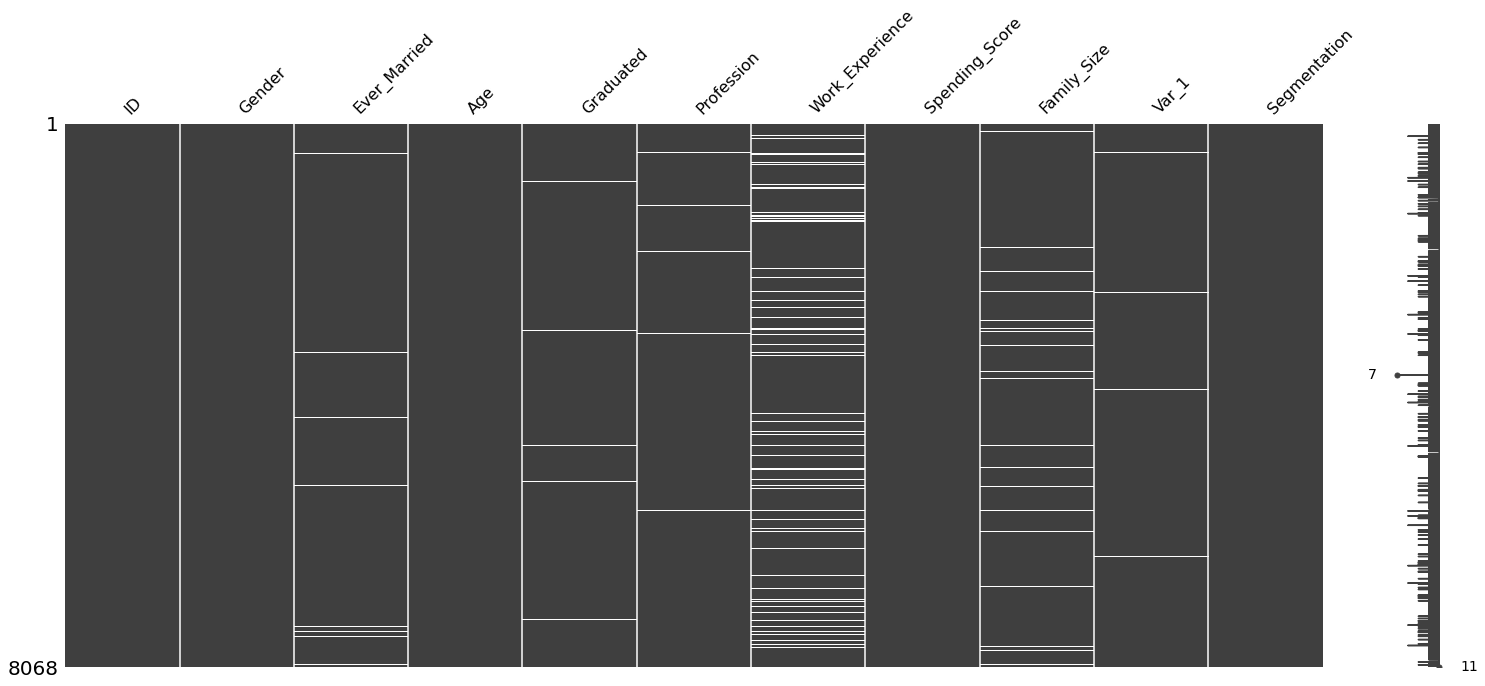

In [52]:
# Plot correlation heatmap of missingness
msno.matrix(customer_data)

### Stage 2 - Exploratory Data Analysis (EDA) 

Objective: Understand the characteristics of the dataset and identify patterns that may influence customer segmentation.  
Steps: Conduct exploratory analysis to grasp the distribution of variables such as gender, marital status, age, education, profession, work experience, spending score, family size, and anonymized category (Var_1).
    Visualize relationships and trends within the dataset to uncover potential insights that may inform customer segmentation.   

In [11]:
customer_data.groupby(['Profession']).describe()

ID                                                   \
                count           mean          std       min        25%   
Profession                                                               
Artist         2516.0  463435.722178  2640.597412  458984.0  461318.75   
Doctor          688.0  463475.863372  2547.318300  458993.0  461430.50   
Engineer        699.0  463645.712446  2308.439205  458989.0  462088.50   
Entertainment   949.0  463464.691254  2598.006649  459055.0  460953.00   
Executive       599.0  463623.721202  2509.078378  458982.0  461730.00   
Healthcare     1332.0  463516.695946  2614.922821  458985.0  461217.50   
Homemaker       246.0  463689.878049  2516.559402  459268.0  461201.25   
Lawyer          623.0  463311.056180  2836.622366  458987.0  460780.00   
Marketing       292.0  463318.020548  2470.860221  458988.0  461134.75   

                                                 Age             ...  \
                    50%        75%       max   count       mean  ...   
Profession                                                       ...   
Artist         463477.0  465704.25  467974.0  2516.0  46.327504  ...   
Doctor         463341.5  465777.00  467958.0   688.0  37.225291  ...   
Engineer       463834.0  465412.00  467973.0   699.0  41.745351  ...   
Entertainment  463369.0  465766.00  467967.0   949.0  43.005269  ...   
Executive      463738.0  465317.00  467961.0   599.0  51.096828  ...   
Healthcare     463491.0  465931.00  467965.0  1332.0  26.827327  ...   
Homemaker      463053.5  466468.50  467817.0   246.0  37.922764  ...   
Lawyer         463119.0  466150.50  467952.0   623.0  75.215088  ...   
Marketing      463398.5  465354.75  467940.0   292.0  36.818493  ...   

              Work_Experience       Family_Size                                \
                          75%   max       count      mean       std  min  25%   
Profession                                                                      
Artist                    4.0  14.0      2447.0  2.510830  1.339302  1.0  2.0   
Doctor                    4.0  14.0       662.0  2.882175  1.519818  1.0  2.0   
Engineer                  4.0  14.0       673.0  2.982169  1.725934  1.0  2.0   
Entertainment             5.0  14.0       909.0  2.788779  1.431800  1.0  2.0   
Executive                 3.0  13.0       585.0  3.429060  1.482377  1.0  2.0   
Healthcare                4.0  14.0      1264.0  3.685918  1.534071  1.0  3.0   
Homemaker                 9.0  14.0       216.0  2.240741  1.474562  1.0  1.0   
Lawyer                    1.0  14.0       590.0  1.935593  1.022292  1.0  1.0   
Marketing                 4.0  14.0       275.0  3.072727  1.672606  1.0  2.0   

                              
               50%  75%  max  
Profession                    
Artist         2.0  3.0  9.0  
Doctor         3.0  4.0  9.0  
Engineer       3.0  4.0  9.0  
Entertainment  2.0  4.0  9.0  
Executive      3.0  4.0  9.0  
Healthcare     4.0  4.0  9.0  
Homemaker      2.0  3.0  9.0  
Lawyer         2.0  2.0  9.0  
Marketing      3.0  4.0  9.0  

[9 rows x 32 columns]

Need to assign imputation of data to the columns Ever_Married, Graduated, Profession, Work_Experience, Family_Size, and Var_1 where possible. Probably need to segment data by Segmentation and then by other columns as much as possible in order to attempt accurate imputation.

### Stage 3 - Data Preprocessing    

Objective: Prepare the dataset for segmentation modeling by handling missing values and encoding categorical variables.  
Steps: Address any missing or inconsistent data points.
    Encode categorical variables, such as gender, marital status, education, profession, and Var_1, to make them suitable for segmentation modeling.  

In [46]:
customer_data_cleaned = customer_data.dropna()
customer_data_cleaned.to_csv("Customer_Segmentation_Dataset_DropedNA.csv")